## Una aplicación interesante

Todos los años, el Ministerio de Medio Ambiente y Recursos Naturales publica predicciones de mareas que estiman para cada día del año y diferentes horas la altura esperada de las olas. Estas predicciones se realizan para cuatro lugares: La Unión, El Triunfo, La Libertad y Acajutla.

Elegimos Acajutla y tomamos los datos correspondientes al jueves, viernes y sábado próximos al día de entrega de este proyecto. La variable independiente es el tiempo, que por conveniencia convertimos a minutos; la variable dependiente es la altura esperada de la ola, medida en metros. A continuación visualizamos los datos:

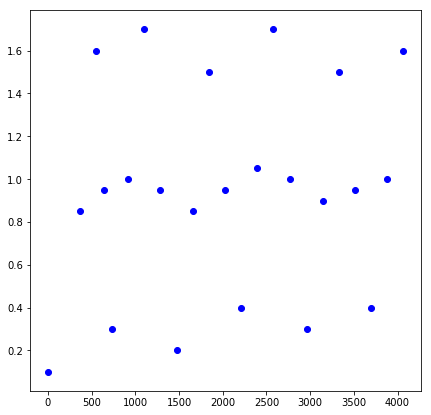

In [67]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7, 7));

minutes = [0, 361, 546 , 638.5, 731, 912.5,1094, 1286.5 ,1479, 1660.5 ,1842, 2027.5,2213, 2394.5,2576, 2768.5,2961, 3144.5 ,3328, 3513.5 ,3699, 3881 ,4063 ]
waveheight = [0.1, 0.85 ,1.6, 0.95,0.3, 1 ,1.7, 0.95 ,0.2, 0.85,1.5, 0.95 ,0.4, 1.05 ,1.7, 1 ,0.3, 0.9 ,1.5, 0.95 ,0.4, 1 ,1.6]

ax.scatter(minutes, waveheight, color='blue', marker='o');
plt.show()

$\DeclareMathOperator{\spn}{span}$

A partir de este gráfico podemos notar varias cosas: la primera es que estamos tratando con un fenómeno periódico, con un período de aproximadamente $720$ min $= 12 $h. Lo segundo es que solo se dan predicciones para las mareas altas y bajas. ¿Qué sucede si deseamos obtener aproximaciones para otras horas? Podríamos realizar una aproximación de mínimos cuadrados. Dada la periodicidad del fenómeno, parece adecuado utilizar polinomios trigonométricos para construir la curva, es decir, dado $n \in \mathbb{N}$, queremos elegir un elemento de $\spn \{ \frac{1}{2}, \cos(t), \cos(2t), \ldots , \cos(nt) , \ldots , \sin(t), \sin(2t), \ldots , \sin(nt) \}$ que minimice el error cuadrático. Tal elemento tendrá la forma

$$ p_{n}(t) = \frac{a_{0}}{2} + \sum_{k=1}^{n} ( a_{k} cos(kt) + b_{k}sin(kt) )  $$

Denotaremos por $\mathbf{t}$ el vector $12$-dimensional que arriba se declaró como $\mathtt{minutes}$ y por $\mathbf{h}$ el vector que arriba se denominó $\mathtt{waveheights}$ y contiene las alturas esperadas. Además, definimos el vector 

$$ \mathbf{p} = ( p_{n}(t_{1}), p_{n}(t_{2}), p_{n}(t_{3}), \ldots , p_{n}(t_{12})   ) $$

es decir, cada uno de los minutos en $\mathbf{t}$ evaluados en el polinomio trigonométrico de aproximación. Entonces deseamos minimizar la norma $2$ en $\mathbb{R}^{12}$ al cuadrado:

$$ || \mathbf{h} - \mathbf{p} ||_{2}^{2}   =  \sum_{i=1}^{12} (w_{i} - p_{n}(t_{i}))^{2} $$

Puesto que esta expresión depende únicamente de los coeficientes $a_{0}$, $a_{k}$ y $b_{k}$ garantizamos un mínimo derivando parcialmente respecto a cada coeficiente e igualando a $0$, con lo que se obtienen las ecuaciones normales. Sabemos que el sistema $\{ \frac{1}{2}, \cos(t), \cos(2t), \ldots , \cos(nt) , \ldots , \sin(t), \sin(2t), \ldots , \sin(nt) \}$ es ortogonal en $C[-\pi, \pi]$ respecto al producto interno de ese espacio vectorial. La pregunta es: ¿es este sistema ortogonal respecto al producto interno de $\mathbb{R}^{12}$? La respuesta es sí y para demostrarla necesitamos del siguiente lema ...

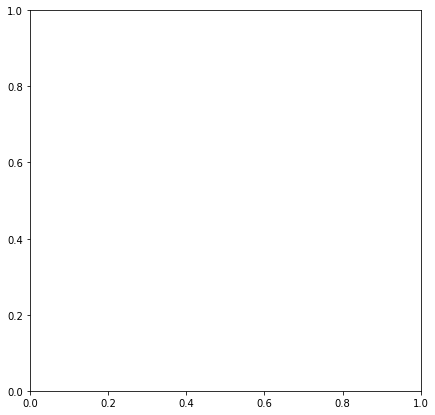

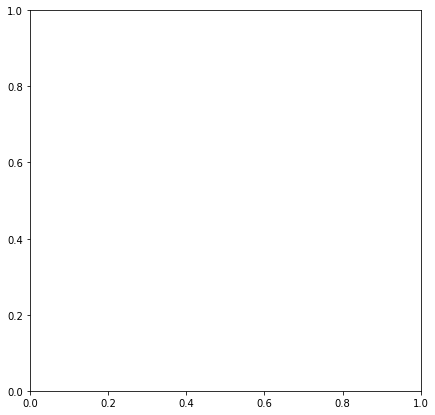

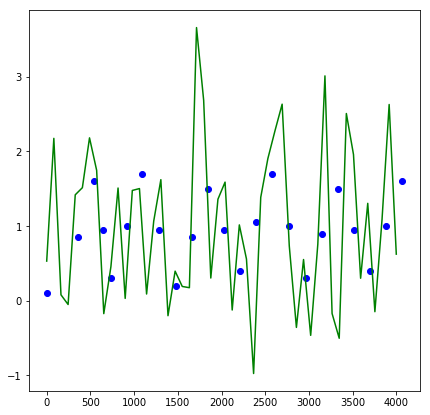

In [70]:
from sympy import *
from sympy.abc import t
from mpmath import nsum
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7, 7));


minutes = [0, 361, 546 , 638.5, 731, 912.5,1094, 1286.5 ,1479, 1660.5 ,1842, 2027.5,2213, 2394.5,2576, 2768.5,2961, 3144.5 ,3328, 3513.5 ,3699, 3881 ,4063 ]
waveheight = [0.1, 0.85 ,1.6, 0.95,0.3, 1 ,1.7, 0.95 ,0.2, 0.85,1.5, 0.95 ,0.4, 1.05 ,1.7, 1 ,0.3, 0.9 ,1.5, 0.95 ,0.4, 1 ,1.6]


ak = []
bk = []

for i in range(0, 21):
    ai = float((1/10)*nsum( lambda k: waveheight[int(k)]*cos( (i*pi* minutes[int(k)])/360 )  , [0, 21] ))
    ak.append(ai)
    if i > 0:
        bi = float((1/10)*nsum( lambda k: waveheight[int(k)]*sin( (i*pi* minutes[int(k)])/360 )  , [0, 21] ))
        bk.append(bi)

#Ahora construimos la función
pol = ak[0]*(1/2) + bk[0]*sin( (pi* t)/360 )


for i in range(1, 21):
    pol += ak[i]*cos( (i*pi* t)/360 )
    if i > 1 and i < 4:
        pol += bk[i]*sin( (i*pi* t)/360 )
        
lambdap = lambdify(t, pol);  



xv = np.linspace(-1 , 4000);
ax.scatter(minutes, waveheight, color='blue', marker='o');
ax.plot(xv, lambdap(xv), color='green');

plt.show()